In [1]:
#Libraries Which we used for our project Wine quality prediction.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import numpy as np


In [2]:
#Loading dataset from path
winew = pd.read_csv('winequalityN.csv')
winer = pd.read_csv('winequality.csv')

In [3]:
winer.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
winew.drop('type',
  axis='columns', inplace=True)

In [5]:
winew.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
winew.describe()
winer.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
winew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [8]:
#Shape of White Wine
winew.shape

(6497, 12)

In [9]:
#shape of red wine
winer.shape

(1599, 12)

In [10]:
#checking Null values in Dataset
winew.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
#Filling null Values in the dataset 
winew = winew.fillna(winew.mean())

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

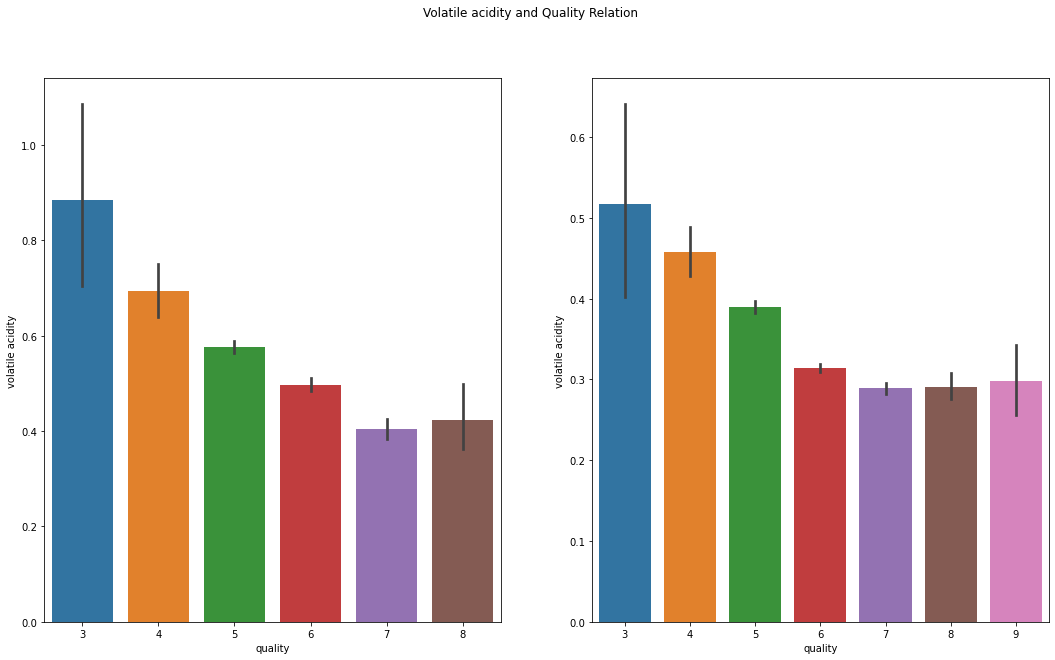

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('Volatile acidity and Quality Relation')

sns.barplot(ax=axes[0], data=winer, x='quality', y='volatile acidity')
sns.barplot(ax=axes[1], data=winew, x='quality', y='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

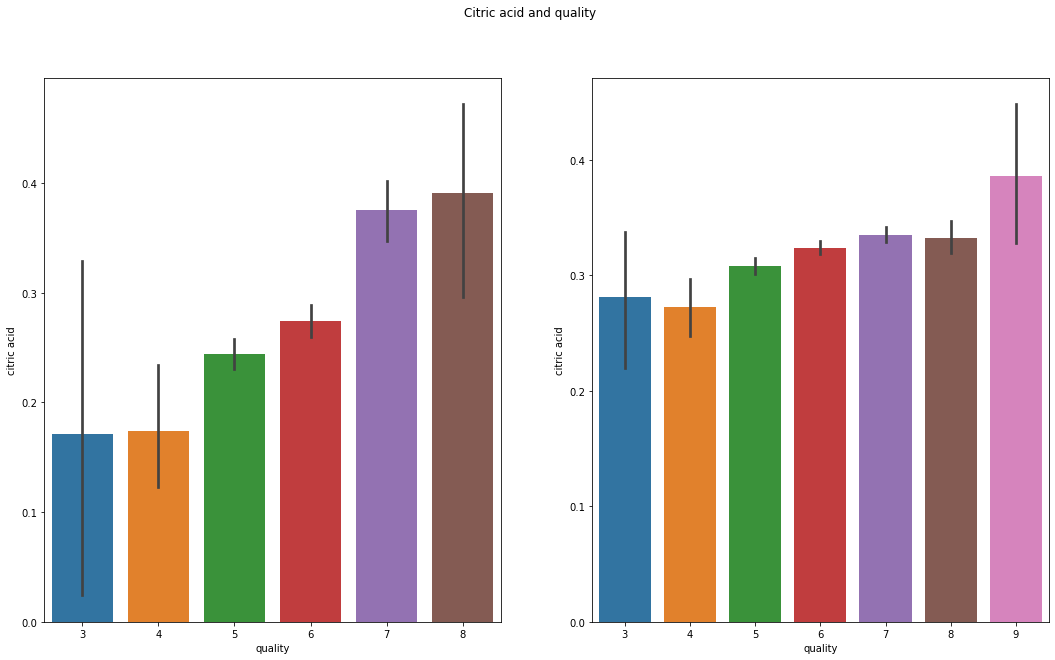

In [13]:
fig, axes = plt.subplots(1,2, figsize=(18, 10))

fig.suptitle('Citric acid and quality')

sns.barplot(ax=axes[0], data=winer, x='quality', y='citric acid')
sns.barplot(ax=axes[1], data=winew, x='quality', y='citric acid')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

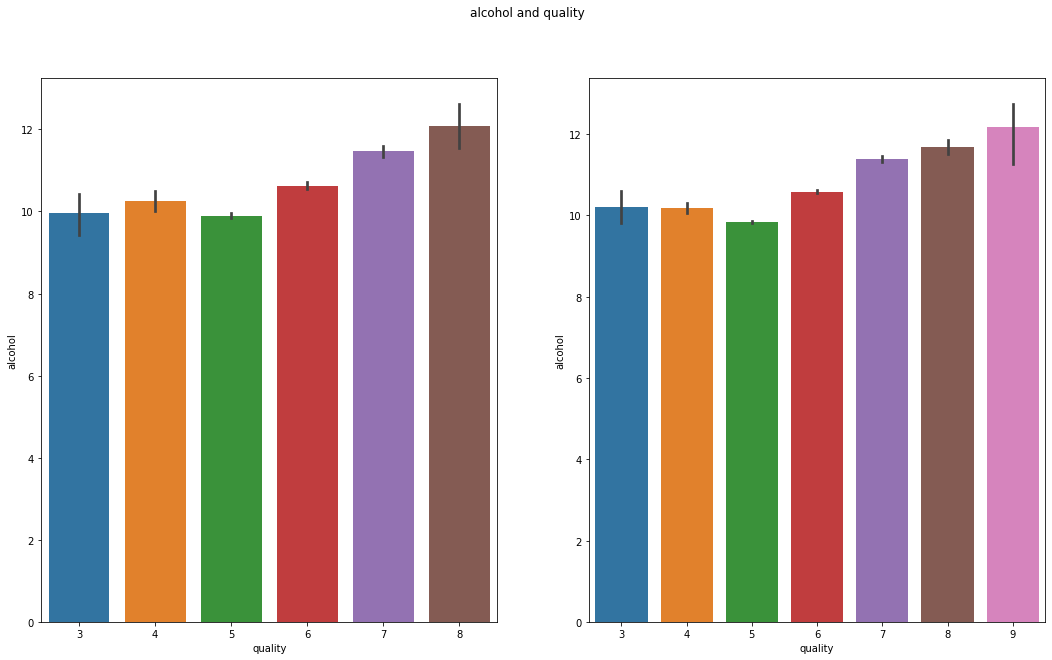

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('alcohol and quality')

sns.barplot(ax=axes[0], data=winer, x='quality', y='alcohol')
sns.barplot(ax=axes[1], data=winew, x='quality', y='alcohol')

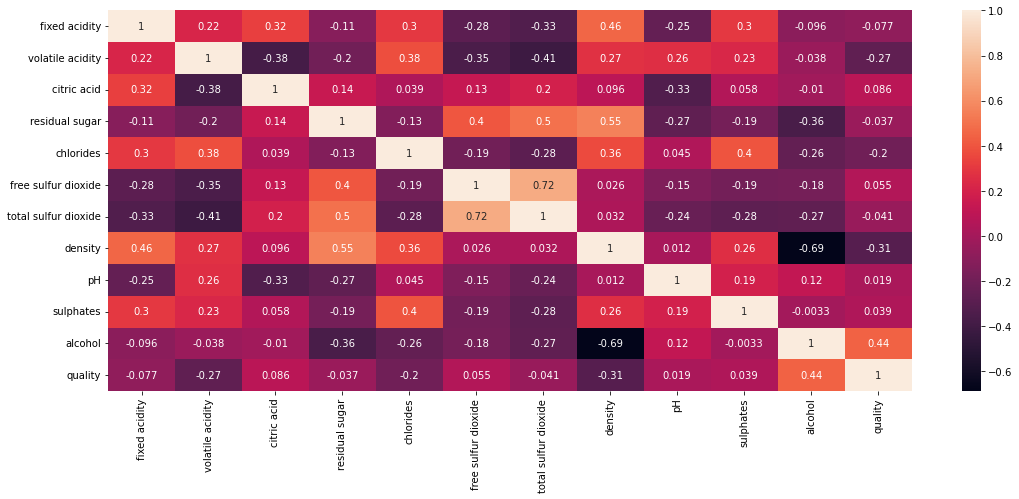

In [15]:

# correlation matrix of white wine

plt.figure(figsize=[18,7])
# plot correlation

sns.heatmap(winew.corr(),annot=True)
plt.show()

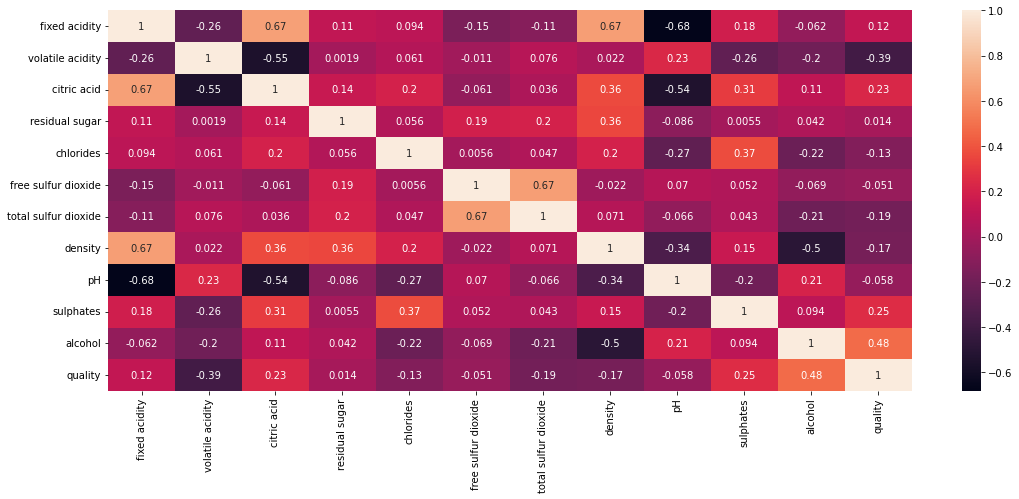

In [16]:
# correlation matrix of red wine

plt.figure(figsize=[18,7])
# plot correlation

sns.heatmap(winer.corr(),annot=True)
plt.show()

In [17]:

X = winew.drop('quality',axis=1)
C = winer.drop('quality',axis=1)

In [18]:
print(X)
print(C)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [19]:
D = winer['quality'].apply(lambda d_value: 1 if d_value>=6.5 else 0)
Y = winew['quality'].apply(lambda y_value: 1 if y_value>=6.5 else 0)

In [20]:
#SPLITTING INTO TRAIN TEST
C_train, C_test, D_train, D_test = train_test_split(C, D, test_size=0.2, random_state=3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [21]:
print(Y.shape, Y_train.shape, Y_test.shape)
print(D.shape, D_train.shape, D_test.shape)

(6497,) (5197,) (1300,)
(1599,) (1279,) (320,)


In [22]:
model1 = RandomForestClassifier(n_estimators=80)
model2 = RandomForestClassifier(n_estimators=80)

In [23]:
model1.fit(X_train, Y_train)
model2.fit(C_train, D_train)


RandomForestClassifier(n_estimators=80)

In [24]:
X_test_prediction = model1.predict(X_test)
test_data_accuracyW = accuracy_score(X_test_prediction, Y_test)
C_test_prediction = model2.predict(C_test)
test_data_accuracyR = accuracy_score(C_test_prediction, D_test)

In [25]:
print('Accuracy : ', test_data_accuracyR)
print('Accuracy : ', test_data_accuracyW)

Accuracy :  0.934375
Accuracy :  0.8830769230769231


In [26]:
# print('calculating the error')
 
# # checking mean_squared error
# y_predict = model.predict(Y_test)



# MSE = mean_squared_error(Y_test,y_predict)
 
# # checking root mean squared error

# RMSE = np.sqrt(MSE)
 

# print('mean squared error is : ',MSE)
 

# print('root mean squared error is : ',RMSE)
 

# print(classification_report(Y_test,y_predict))

In [27]:
#quality prediction for red wine
lis=[]
print("enter fixed acidity")
lis.append(eval(input()))
print("enter volatile acidity")
lis.append(eval(input()))
print("enter citric acid")
lis.append(eval(input()))
print("enter residual sugar")
lis.append(eval(input()))
print("enter chlorides")
lis.append(eval(input()))
print("enter free sulfur dioxide")
lis.append(eval(input()))
print("enter total sulfur dioxide")
lis.append(eval(input()))
print("enter density")
lis.append(eval(input()))
print("enter pH")
lis.append(eval(input()))
print("enter sulphates")
lis.append(eval(input()))
print("enter alcohol")
lis.append(eval(input()))
lis = tuple(lis)


input_data_as_numpy_array = np.asarray(lis)
print(input_data_as_numpy_array)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

enter fixed acidity
1
enter volatile acidity
0.8
enter citric acid
0.9
enter residual sugar
0.1
enter chlorides
0.2
enter free sulfur dioxide
0.6
enter total sulfur dioxide
0.3
enter density
0.7
enter pH
0.8
enter sulphates
1.0
enter alcohol
0.5
[1.  0.8 0.9 0.1 0.2 0.6 0.3 0.7 0.8 1.  0.5]
[0]
Bad Quality Wine


D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
# quality prediction for white wine.

lis1=[]
print("enter fixed acidity")
lis1.append(eval(input()))
print("enter volatile acidity")
lis1.append(eval(input()))
print("enter citric acid")
lis1.append(eval(input()))
print("enter residual sugar")
lis1.append(eval(input()))
print("enter chlorides")
lis1.append(eval(input()))
print("enter free sulfur dioxide")
lis1.append(eval(input()))
print("enter total sulfur dioxide")
lis1.append(eval(input()))
print("enter density")
lis1.append(eval(input()))
print("enter pH")
lis1.append(eval(input()))
print("enter sulphates")
lis1.append(eval(input()))
print("enter alcohol")
lis1.append(eval(input()))
lis1 = tuple(lis1)
input_data_as_numpy_array1 = np.asarray(lis1)
print(input_data_as_numpy_array1)
input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


enter fixed acidity
0.8
enter volatile acidity
0.5
enter citric acid
0.2
enter residual sugar
0.8
enter chlorides
0.1
enter free sulfur dioxide
0.8
enter total sulfur dioxide
0.9
enter density
0.6
enter pH
1.0
enter sulphates
0.8
enter alcohol
0.9
[0.8 0.5 0.2 0.8 0.1 0.8 0.9 0.6 1.  0.8 0.9]
[0]
Bad Quality Wine


D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
x_predict = list(model2.predict(X_test))

df = {'predicted':x_predict,'orignal':Y_test}

pd.DataFrame(df).tail(10)

,predicted,orignal
5934,1,1
1891,0,0
2417,0,0
4312,1,0
5118,0,0
5453,0,0
312,0,0
1507,0,0
4750,0,0
2053,0,0


In [30]:
from tkinter import *
from tkinter import messagebox
import os

In [31]:
def home_screen():
    root =Tk()
    root.title("GUI")
    root.state('zoomed')
    root.resizable(width = False,height = True)
    root.configure(bg = "gray")
    
    MainFrame = Frame(root, bg = "gray")
    MainFrame.pack()
    root_lbl = Label(MainFrame,text = "Wine Quality Prediction",bg = "lavender", fg = "black",font = ('',40,'bold','underline'), width=50, height=2, relief='raised', borderwidth=5)
    root_lbl.pack(anchor = N,expand = True)
    
    q_frame = Frame(MainFrame,bg = 'gray', width = 1400, height=800, relief='flat', borderwidth=5)
    q_frame.pack(side = LEFT,anchor = W,expand = True)

    br_file = Label(q_frame,text = "DETAILS OF WINE",bg = "white",font = ('',24,'bold'),relief = 'flat',width = 20)
    br_file.place(relx = 0.4,rely = 0.001)
    
    
    Label(MainFrame, text='fixed acidity',font=('bold',25)).place(relx = 0.1,rely = 0.3)
    e1 = Entry(MainFrame,font=('bold',15))
    e1.place(relx = 0.27, rely = 0.31)
    e1.focus()

    
    Label(MainFrame, text='volatile acidity',font=('bold',25)).place(relx = 0.5,rely = 0.3)
    e2= Entry(MainFrame,font=('bold',15))
    e2.place(relx = 0.68, rely = 0.31)
    e2.focus()
    
    
    Label(MainFrame, text='citric acid',font=('bold',25)).place(relx = 0.1,rely = 0.4)
    e3 = Entry(MainFrame,font=('bold',15))
    e3.place(relx = 0.27, rely = 0.41)
    e3.focus()
    

    
    Label(MainFrame, text='residual sugar',font=('bold',25)).place(relx = 0.5,rely = 0.4)
    e4 = Entry(MainFrame,font=('bold',15))
    e4.place(relx = 0.68,rely = 0.41)
    e4.focus()
    
    
    Label(MainFrame, text='chlorides',font=('bold',25)).place(relx = 0.1,rely = 0.5)
    e5 = Entry(MainFrame,font=('bold',15))
    e5.place(relx = 0.27, rely = 0.51)
    e5.focus()
    
    
    
    Label(MainFrame, text='free sulfur dioxide',font=('bold',25)).place(relx = 0.5,rely = 0.5)
    e6 = Entry(MainFrame,font=('bold',15))
    e6.place(relx = 0.68, rely = 0.51)
    e6.focus()
    
    
    Label(MainFrame, text='total sulfur dioxide',font=('bold',25)).place(relx = 0.1,rely = 0.6)
    e7 = Entry(MainFrame,font=('bold',15))
    e7.place(relx = 0.27, rely = 0.61)
    e7.focus()
    
    
    
    Label(MainFrame, text='density',font=('bold',25)).place(relx = 0.5,rely = 0.6)
    e8 = Entry(MainFrame,font=('bold',15))
    e8.place(relx = 0.68, rely = 0.61)
    e8.focus()
    
    
    
    Label(MainFrame, text='pH',font=('bold',25)).place(relx = 0.1,rely = 0.7)
    e9 = Entry(MainFrame,font=('bold',15))
    e9.place(relx = 0.27, rely = 0.71)
    e9.focus()
    
    
    Label(MainFrame, text='sulphates',font=('bold',25)).place(relx = 0.5,rely = 0.7)
    e10 = Entry(MainFrame,font=('bold',15))
    e10.place(relx = 0.68, rely = 0.71)
    e10.focus()
    
    
    Label(MainFrame, text='alcohol',font=('bold',25)).place(relx = 0.1,rely = 0.8)
    e11 = Entry(MainFrame,font=('bold',15))
    e11.place(relx = 0.27, rely = 0.81)
    e11.focus()
    
    

    def Predict1():
        fix = e1.get()
        vola = e2.get()
        citri = e3.get()
        resi = e4.get()
        chlro = e5.get()
        free = e6.get()
        sulfur = e7.get()
        density = e8.get()
        ph = e9.get()
        sulpha = e10.get()
        alco = e11.get()
        lis1 = (fix,vola,citri,resi,chlro,free,sulfur,density,ph,sulpha,alco)
        input_data_as_numpy_array1 = np.asarray(lis1)
        input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)

        prediction = model2.predict(input_data_reshaped1)
        if (prediction[0]==1):
            k = 'Good Quality Wine'
        else:
            k = 'Bad Quality Wine'
        messagebox.showinfo(title="Predict",message=f"Predict is {str(k)}")

   
    
    predict_btn = Button(q_frame,text = "PREDICT",command=Predict1,bg = "pink",font = ('',18,'bold'),relief = 'raised')
    predict_btn.place(relx = 0.5,rely = 0.9)
    
    root.mainloop()


In [ ]:
home_screen()